In [4]:
# import libraries

import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
import seaborn as sns


# special matplotlib argument for improved plots
from matplotlib import rcParams


%matplotlib inline
sns.set(rc={"figure.figsize": (10, 8)})

In [5]:
# pulling the data

r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")
data = r.text.replace('\n', ' ').split(" ")
data = list(filter(lambda x: x != '', data))
feats = ["CRIM","ZN","INDUS","CHAS","NOX","RM", "AGE","DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"] 
df = pd.DataFrame(columns=feats)
num = int(len(data)/14)
for i in range(num):
    df.loc[i] = data[i*14:i*14+14]
df.to_csv("housing.csv", index=False)

In [6]:
# read into dataframe

data = pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
print(data.shape)

(506, 14)


In [8]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
# we see that there is no missing data

In [10]:
# analyse the target column
data['MEDV'].describe()



count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

/Users/JazlynChuah/miniconda3/envs/CE9010_PROJECT/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


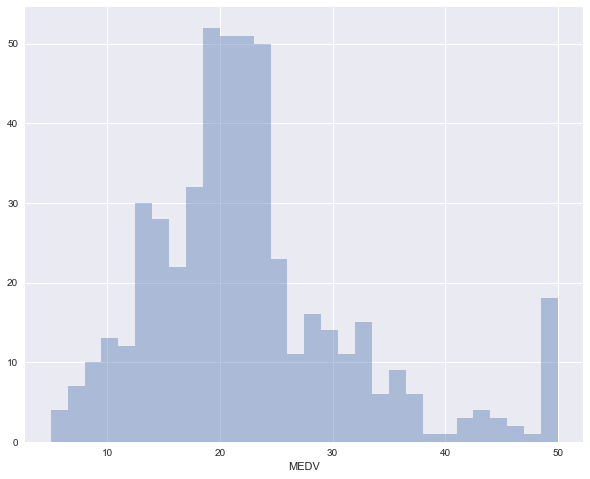

In [11]:
# to get a better understanding of the distribution of the MEDV variable
sns.distplot(data['MEDV'], bins=30, kde=False)
plt.show()

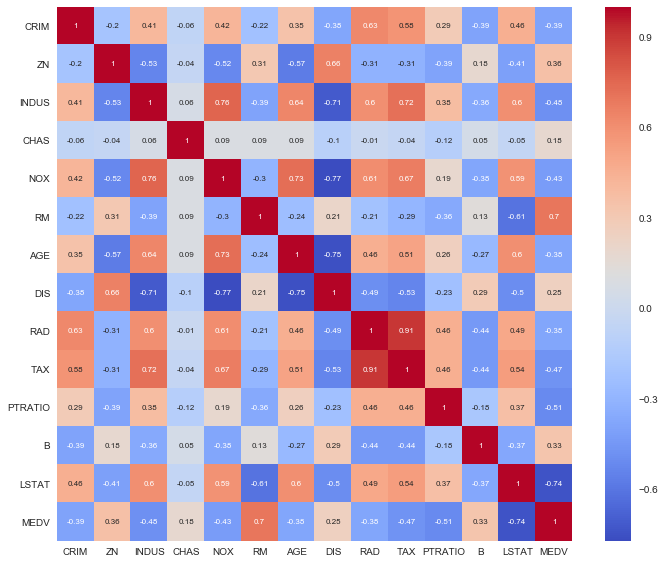

In [12]:
# visualise the correlation between all variables in the dataset using a heatmap
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

In [13]:
# from the heatmap, we can see that 
# the three variables with the strongest correlation to MEDV 
# are the LSTAT (percentage of homeowners in the neighborhood considered "lower class"),
# RM (average number of rooms per dwelling) and PTRATIO (pupil-teacher ratio by town)
# We can also use the heatmap to check for correlation between variables so that we don’t include multicollinearity into a linear regression.
# For example both RAD and TAX are highly correlated (0.91) so they shouldn’t be used in a linear regression at the same time.

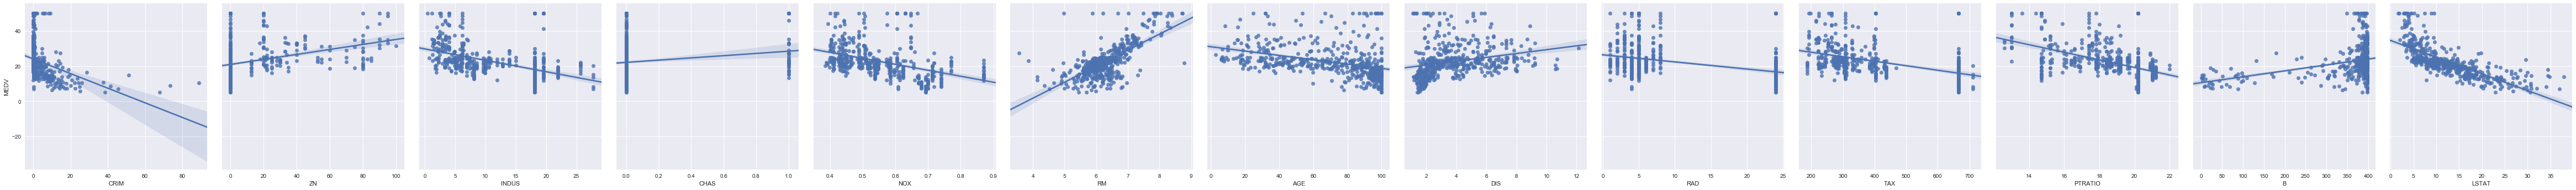

In [14]:
# view the relationship between each variable against the target variable "MEDV"
x_vars = ['CRIM','ZN','INDUS','CHAS','NOX','RM', 'AGE','DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars, y_vars=y_vars, kind="reg", size=5)
# pp = pp.map_offdiag(plt.scatter, s=35, alpha=0.5)


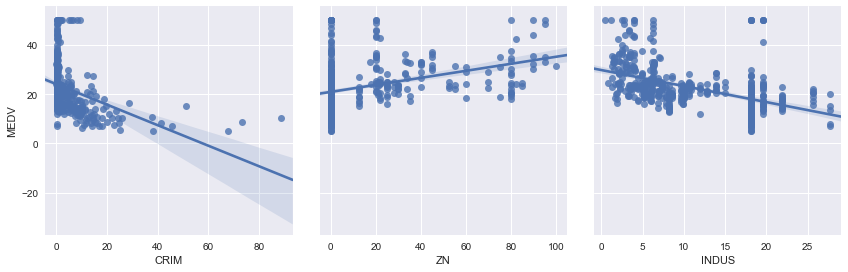

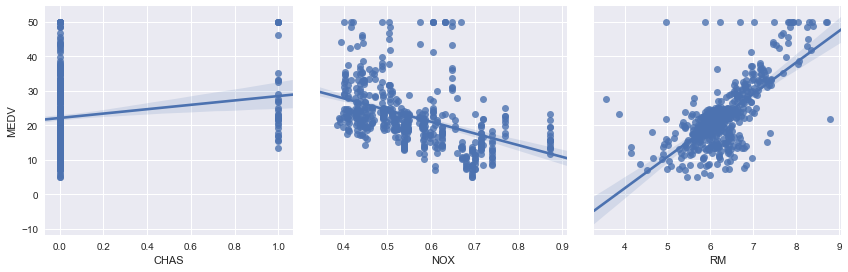

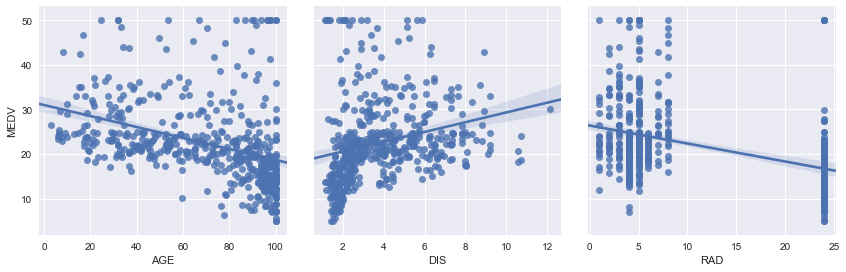

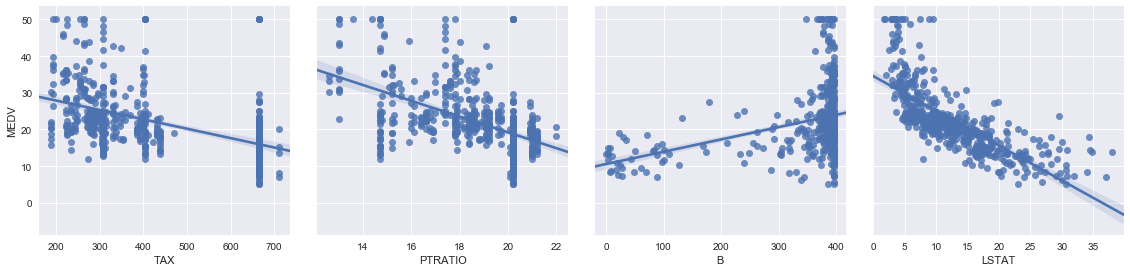

In [15]:
# tried many ways to increase figure size above but for now this is the only way i can do it
# view the relationship between each variable against the target variable "MEDV"
x_vars1 = ['CRIM','ZN','INDUS']
x_vars2 = ['CHAS','NOX','RM']          
x_vars3 = ['AGE','DIS', 'RAD']          
x_vars4 = ['TAX','PTRATIO', 'B', 'LSTAT']          
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars1, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars2, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars3, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars4, y_vars=y_vars, kind="reg", size=4)




In [16]:
# the pairplots confirms our findings from the heatmap.
# i.e
# the three variables with the strongest correlation to MEDV are the 
# LSTAT(percentage of homeowners in the neighborhood considered "lower class")),
# RM (average number of rooms per dwelling) and PTRATIO (pupil-teacher ratio by town)
# we can also see that some other variables have a moderate correlation to MEDV 
# these are: INDUS, NOX, TAX
# the pairplots aligns with our intuition that 
# 1) An increase in value of RM would generally result in the increase of MEDV. 
# 2) An increase in value of LSTAT would decrease the value of MEDV.
# 3) An increase in value of PTRATIO would decrease the value of MEDV.

In [41]:
# Create X and y matrix

X = data.drop('MEDV', axis = 1)
y = data['MEDV']


# shuffle and split data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)




(404, 13)
(102, 13)
(404,)
(102,)


In [42]:
# run linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)
#print the coefficents
print("Linear coefficients: ", model.coef_)


y_pred = lm.predict(X_test)
# Accuracy of the prediction
r_squared = lm.score(X_test, y_test)
adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)





Linear coefficients:  [ -1.30799852e-01   4.94030235e-02   1.09535045e-03   2.70536624e+00
  -1.59570504e+01   3.41397332e+00   1.11887670e-03  -1.49308124e+00
   3.64422378e-01  -1.31718155e-02  -9.52369666e-01   1.17492092e-02
  -5.94076089e-01]
r square:  0.733449214745
adjusted r squared:  0.694072394196


In [43]:

coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients


,Coefficients
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


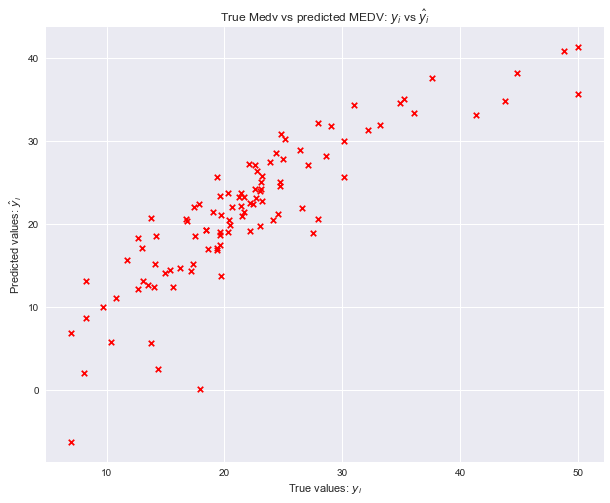

In [44]:
plt.scatter(y_test, y_pred, s=30, c='r', marker='x', linewidths=1)
plt.title("True Medv vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()

# ideadlly the scatter plot should create a linear line, but we see that our model can be improved


In [45]:
# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE:  20.8692921838
RMSE:  4.5682920423


Cross-validated scores: [ 0.73376082  0.4730725  -1.00631454  0.64113984  0.54766046  0.73640292
  0.37828386 -0.12922703 -0.76843243  0.4189435 ]
Cross-Predicted Accuracy:  0.590857129406


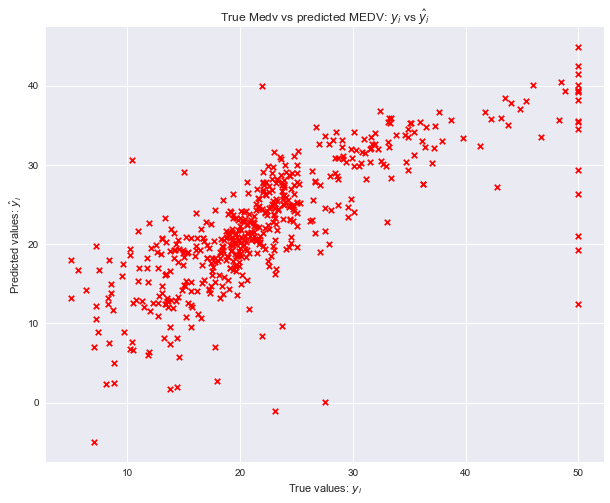

In [24]:
# K-Folds Cross Validation


from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=10)
print("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=10)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

plt.scatter(y, predictions, s=30, c='r', marker='x', linewidths=1)
plt.title("True Medv vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()

In [26]:
# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))



ValueError: Found input variables with inconsistent numbers of samples: [102, 506]

In [46]:
# forward selection using adjusted r squared

import statsmodels.formula.api as smf

def forward_selection(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model


In [47]:
model = forward_selection(data, 'MEDV')

print(model.model.formula)

print("Adjusted r squared: ", model.rsquared_adj)


MEDV ~ LSTAT + RM + PTRATIO + DIS + NOX + CHAS + B + ZN + CRIM + RAD + TAX + 1
Adjusted r squared:  0.734805772327


In [33]:
# the forward selection proposes a model that excludes 'indus' and 'age'

In [48]:
# backward elimination using adjusted r squared

def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((50,6)).astype(int)
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = smf.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
X_Modeled = backwardElimination(X_opt, SL)

TypeError: unhashable type: 'slice'

In [57]:
# test the new model
# Create X and y matrix

X = data.drop(['MEDV', 'INDUS', 'AGE'], axis = 1)
y = data['MEDV']


# shuffle and split data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(404, 11)
(102, 11)
(404,)
(102,)


In [58]:
# run linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)
#print the coefficents
print("Linear coefficients: ", model.coef_)


y_pred = lm.predict(X_test)
# Accuracy of the prediction
r_squared = lm.score(X_test, y_test)
adj_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("r square: ", r_squared)
print("adjusted r squared: ", adj_r_squared)



Linear coefficients:  [ -1.30874477e-01   4.92274359e-02   2.71140111e+00  -1.58622689e+01
   3.42021458e+00  -1.49916045e+00   3.63740694e-01  -1.31359404e-02
  -9.51296233e-01   1.17666494e-02  -5.92481939e-01]
r square:  0.733414995703
adjusted r squared:  0.700832384066


In [59]:
# calculate MSE and RMSE
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


MSE:  20.871971325
RMSE:  4.56858526516
